In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [68]:
!pip install pmdarima==1.8.0

In [69]:
!pip install scikit-learn==0.24

In [70]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/AndhraPradesh1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed
0,2000,1,1,0,0,0,0,0,0,0,0,20,20.736232,937.309814,97.636380,171.103614,1.820233
1,2000,1,1,1,0,0,0,0,0,0,0,20,20.547621,936.590149,97.764840,162.082357,1.616232
2,2000,1,1,2,0,0,0,0,0,0,0,20,20.405927,936.324219,98.032320,148.957279,1.382257
3,2000,1,1,3,0,0,0,0,0,0,0,20,20.305098,936.155273,98.152521,135.256602,1.173256
4,2000,1,1,4,0,0,0,0,0,0,0,19,20.266761,936.478088,98.132011,121.461475,0.998815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,16,21.978556,936.352661,71.490068,110.560279,3.608265
131396,2014,12,31,20,0,0,0,0,0,0,0,16,21.479383,936.720520,75.049659,124.306187,3.618451
131397,2014,12,31,21,0,0,0,0,0,0,0,17,20.939624,936.738586,79.410245,138.093203,3.455779
131398,2014,12,31,22,0,0,0,0,0,0,0,17,20.557559,936.552063,83.143147,151.731824,3.287697


In [71]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(24)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed,Date
0,2000,1,1,0,0,0,0,0,0,0,0,20,20.736232,937.309814,97.636380,171.103614,1.820233,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,20,20.547621,936.590149,97.764840,162.082357,1.616232,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,20,20.405927,936.324219,98.032320,148.957279,1.382257,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,20,20.305098,936.155273,98.152521,135.256602,1.173256,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,19,20.266761,936.478088,98.132011,121.461475,0.998815,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,13,13.790353,939.899292,98.876405,107.660610,2.971705,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,13,14.254964,940.688599,93.838127,94.123193,2.779415,2000-01-01 06:00:00
7,2000,1,1,7,0,59,316,109,59,316,109,13,15.892355,941.445618,86.837310,80.913256,2.547579,2000-01-01 07:00:00
8,2000,1,1,8,0,110,602,333,110,602,333,14,18.137191,942.006470,80.201618,68.258226,2.482057,2000-01-01 08:00:00
9,2000,1,1,9,0,138,740,547,138,740,547,14,21.422234,941.736328,66.567218,56.554706,2.902531,2000-01-01 09:00:00


In [72]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
X.head(24)

,GHI
Date,
2000-01-01 00:00:00,0
2000-01-01 01:00:00,0
2000-01-01 02:00:00,0
2000-01-01 03:00:00,0
2000-01-01 04:00:00,0
2000-01-01 05:00:00,0
2000-01-01 06:00:00,0
2000-01-01 07:00:00,109
2000-01-01 08:00:00,333


In [73]:
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
X.head(24)

,Date,GHI
0,2000-01-01 08:00:00,333
1,2000-01-01 09:00:00,547
2,2000-01-01 10:00:00,714
3,2000-01-01 11:00:00,818
4,2000-01-01 12:00:00,797
5,2000-01-01 13:00:00,790
6,2000-01-01 14:00:00,664
7,2000-01-01 15:00:00,500
8,2000-01-01 16:00:00,282
9,2000-01-01 17:00:00,54


In [74]:
y=X.resample('D',on='Date').mean()
y

,GHI
Date,
2000-01-01,549.9
2000-01-02,558.1
2000-01-03,507.1
2000-01-04,554.1
2000-01-05,554.7
...,...
2014-12-27,526.6
2014-12-28,370.0
2014-12-29,480.1


In [75]:
X_train=y[:'2011']
X_test=y['2012':]

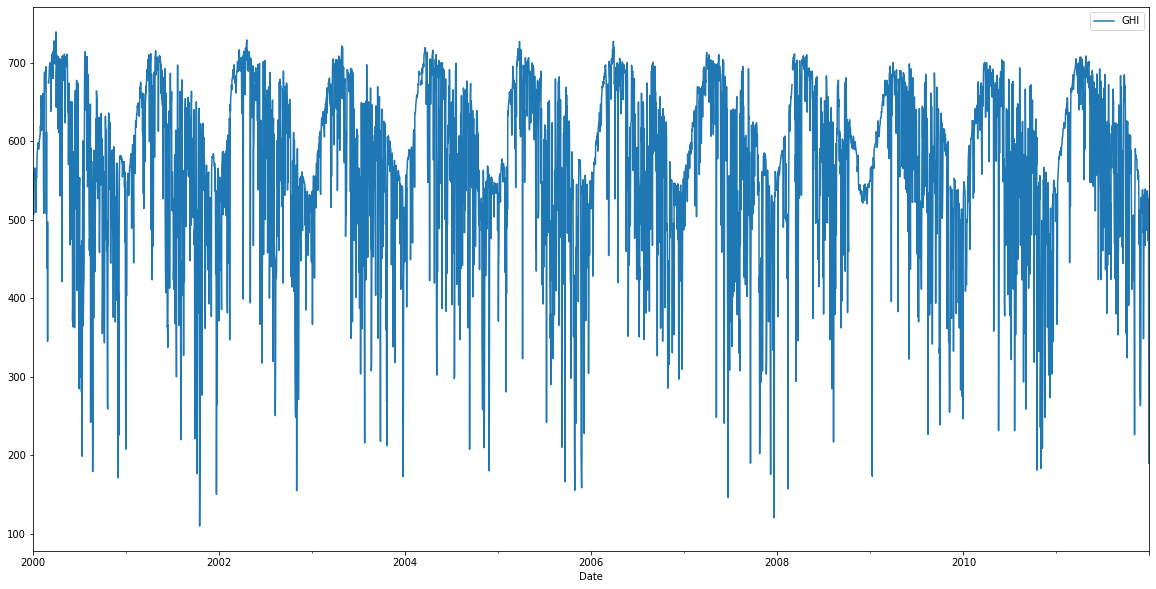

In [76]:
X_train.plot(figsize=(20,10))

In [77]:
TrainDF=pd.DataFrame(X_train)
TrainDF=TrainDF.reset_index()

In [78]:
TrainDF=TrainDF.dropna()
TrainDF=TrainDF.reset_index()

In [79]:
del TrainDF['index']
TrainDF

,Date,GHI
0,2000-01-01,549.9
1,2000-01-02,558.1
2,2000-01-03,507.1
3,2000-01-04,554.1
4,2000-01-05,554.7
...,...,...
4375,2011-12-27,473.6
4376,2011-12-28,526.6
4377,2011-12-29,523.8
4378,2011-12-30,190.1


In [80]:
TrainDF.plot(figsize=(20,10))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7efc30862d40> (for post_execute):


ValueError: ignored

ValueError: ignored

In [81]:
TrainDataFinal=[]
for i in range(5):
  newFoo=TrainDF[i::5]
  newFoo.set_index('Date',inplace=True)
  TrainDataFinal.append(newFoo)
TrainDataFinal

[              GHI
 Date             
 2000-01-01  549.9
 2000-01-06  556.2
 2000-01-11  537.8
 2000-01-16  566.1
 2000-01-21  598.4
 ...           ...
 2011-12-07  484.4
 2011-12-12  531.7
 2011-12-17  533.6
 2011-12-22  513.4
 2011-12-27  473.6
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-02  558.1
 2000-01-07  563.1
 2000-01-12  509.8
 2000-01-17  584.3
 2000-01-22  597.6
 ...           ...
 2011-12-08  489.4
 2011-12-13  531.0
 2011-12-18  532.3
 2011-12-23  520.0
 2011-12-28  526.6
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-03  507.1
 2000-01-08  565.7
 2000-01-13  553.1
 2000-01-18  588.7
 2000-01-23  590.5
 ...           ...
 2011-12-09  348.5
 2011-12-14  534.1
 2011-12-19  486.2
 2011-12-24  537.3
 2011-12-29  523.8
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-04  554.1
 2000-01-09  566.3
 2000-01-14  556.4
 2000-01-19  590.2
 2000-01-24  596.1
 ...           ...
 2011-12-10  425.9
 2011-12-1

In [82]:
from pmdarima.arima import ARIMA

predictions=[]
for i in range(5):
  stepwise_model = ARIMA(order=(1,1,0),seasonal_order=(1,1,0,73))
  stepwise_model.fit(TrainDataFinal[i])
  print(stepwise_model.summary())
  pred=stepwise_model.predict(n_periods=219)
  predictions.append(pred)
predictions

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  876
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 73)   Log Likelihood               -5014.473
Date:                            Tue, 27 Apr 2021   AIC                          10036.946
Time:                                    19:59:40   BIC                          10055.695
Sample:                                         0   HQIC                         10044.148
                                            - 876                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0886      4.577      0.019      0.985      -8.882       9.060
ar.L1         -0.4282      0.028   

[array([561.83376191, 582.44329288, 559.73715647, 582.38538079,
        622.7081289 , 579.49818537, 651.16043799, 658.90090748,
        662.50452241, 663.41143838, 662.53069514, 604.47663267,
        693.1562082 , 709.56416227, 716.88162993, 722.10840517,
        727.27212314, 724.56491051, 727.11210043, 701.54807503,
        725.78573463, 721.94316573, 674.79316291, 722.34162233,
        695.79064423, 718.775565  , 703.03454034, 680.13727401,
        628.54015745, 639.17541448, 688.75837782, 604.3949164 ,
        644.42584248, 504.8082333 , 641.34983175, 670.31553481,
        632.24940696, 605.51244358, 717.99666526, 682.086353  ,
        608.53930634, 571.47935688, 623.90296946, 602.71707127,
        649.51054729, 612.32856725, 544.62694675, 463.4728828 ,
        489.71531352, 430.51749787, 516.4290598 , 684.86882077,
        587.40479677, 711.3564752 , 677.64406571, 594.96488529,
        658.73929337, 563.9256156 , 586.83564951, 471.8932267 ,
        566.70338385, 365.98004555, 463.

In [83]:
results=[]
for j in range(len(predictions[0])):
  for i in range(5):
    results.append(predictions[i][j])
results

[561.8337619093841,
 563.85239135338,
 560.782830991108,
 353.4986746474677,
 412.2880848018655,
 582.4432928847164,
 587.7211185429405,
 602.8836492468417,
 340.25054008777204,
 414.2204499512193,
 559.7371564706733,
 535.1046989890328,
 548.3129072383691,
 387.71337949566185,
 460.58665656678903,
 582.3853807899219,
 584.4058980059685,
 626.7578847178479,
 421.91899764891946,
 491.7273828794218,
 622.7081288989193,
 632.061831633865,
 647.2600105649145,
 467.8456615453257,
 480.5679084785953,
 579.4981853655713,
 620.2747194190915,
 636.7976198926241,
 464.00388952224716,
 522.8146775194856,
 651.160437986265,
 649.1693392559656,
 664.7035918405635,
 481.8709414666571,
 532.7061873145551,
 658.9009074817243,
 668.6904989281434,
 679.2557958215239,
 499.92969866674645,
 492.5901793196069,
 662.5045224141214,
 627.4776663581135,
 681.1718806665633,
 503.8390449456311,
 550.6493677679773,
 663.4114383813952,
 637.721375580724,
 693.7848698983466,
 487.5511182230902,
 543.5972561932309,


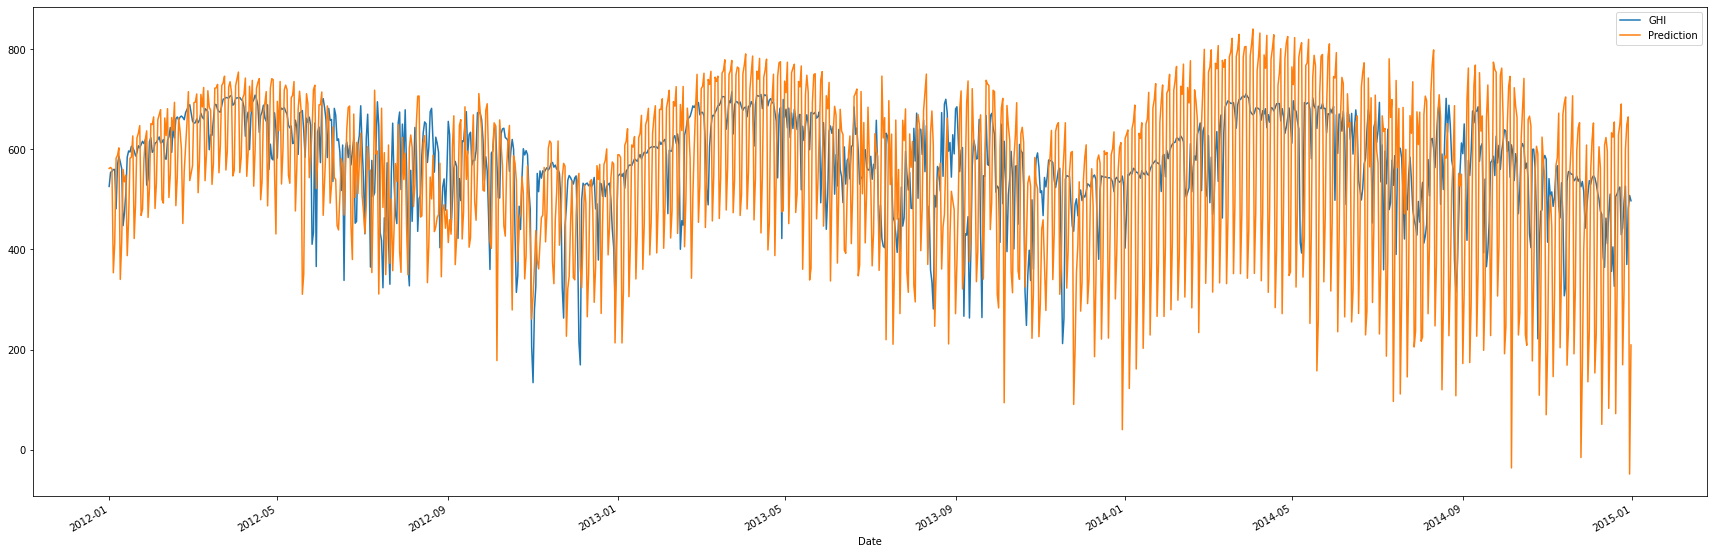

In [84]:
X_test=X_test.dropna()
Finalresults = pd.DataFrame(results,index = X_test[:1095].index,columns=['Prediction'])
pd.concat([X_test[:1095],Finalresults],axis=1).plot(figsize=(30,10))

In [43]:
len(results)

1095

In [44]:
Finalresults

,Prediction
Date,
2012-01-01,561.833762
2012-01-02,563.852391
2012-01-03,560.782831
2012-01-04,353.498675
2012-01-05,412.288085
...,...
2014-12-27,599.700574
2014-12-28,649.486240
2014-12-29,664.690736


In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test[:1095],Finalresults ,squared=False)

178.59281252701018

In [46]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(X_test,Finalresults)

0.2673203000911007

In [ ]:
Finalresults.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/SARIMAdaily.csv')